In [ ]:
###################################################### STEP 1 ######################################################
# Create .gmt file for different Gene Sets to check against specific cell types 
####################################################################################################################

###################################################### STEP 2 ######################################################
# Obtain All Markers which are differentially expressed for each cluster in Single Cell Analysis Pipeline
# Create individual .rnk files for each cluster based on either one of the below
# 2.1 Average Log FC
# 2.2 Absolute Average Log FC 
# 2.3 Unweighted (by assigning the same value to each gene across all clusters)
####################################################################################################################

###################################################### STEP 3 ######################################################
# Obtain All Markers which are differentially expressed for each cluster in Single Cell Analysis Pipeline
# Create individual .rnk files for each cluster based on either one of the below
# 3.1 Average Log FC
# 3.2 Absolute Average Log FC 
# 3.3 Unweighted (by assigning the same value to each gene across all clusters)
####################################################################################################################

###################################################### STEP 4 ######################################################
# Create a matrix populated by GSEA FDR values for each Cluster against each Gene set for visualizing expressions of 
# specific gene sets within specific clusters.
# 4.1 Average Log FC
# 4.2 Absolute Average Log FC 
# 4.3 Unweighted (by assigning the same value to each gene across all clusters)
# IMPORTANT: Run STEP 0 after running STEP 4 each time, if running more than once
####################################################################################################################

###################################################### STEP 5 ######################################################
# Creating Heat Map visualisation for the matrix created for each of the above options of .rnk files
# 5.1 Average Log FC
# 5.2 Absolute Average Log FC 
# 5.3 Unweighted (by assigning the same value to each gene across all clusters)
####################################################################################################################

In [1]:
# Import required libraries
import pandas as pd
import os
import numpy
# Required for Step 4
import re
# Required for Step 5
import seaborn as sns
import matplotlib as plt

In [22]:
# STEP 0 [Recommended each time STEP 4 is to be run to prevent incorrect results]
######################################## Clear Environment of all DataFrames ########################################
# Get a list of all pandas DataFrames to clear from the environment to prevent mixing up of dataframes
list_df = [name for name, value in globals().items() if isinstance(value, pd.DataFrame)]
for name in list_df:
    if not name.startswith('_'):
        del globals()[name]
####################################################################################################################

In [ ]:
## STEP 1
######################################## Create .gmt file for all gene lists ########################################
#file_path = [dir1 + file for file in file_list]
dir1 = "/Users/sha6hg/Desktop/IPF_scRNA/AnnotationFiles/KrasnowAnnotationFiles/Human_to_Mouse_Conversion/"
file_list = [file for file in os.listdir(dir1) if ".txt" in file]
count = 0
for file in file_list:
    name1 = file.split(".txt")[0]
    name2 = name1 + "Markers"
    file_path = dir1 + file
    gene_list = pd.read_csv(file_path, header = None, sep = "\n")
    gene_list1 = list(gene_list[0])
    gene_list2 = [name1, name2] +  gene_list1
    filename1 = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/KrasnowAnnotationsForGSEA.gmt"
    if count == 0:
        with open(filename1, 'w') as filehandle:
            for gene in gene_list2:
                filehandle.write('%s\t' % gene)
    if count >= 1:
        with open(filename1, 'a') as filehandle:
            filehandle.write('\n')
            for gene in gene_list2:
                filehandle.write('%s\t' % gene)
    count = count + 1
####################################################################################################################

In [24]:
## STEP 2.1 [Average Log FC]
################################ Create .rnk files from markers_per_cluster(Seurat) ################################
dir2 = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/"
filename2 = "/Users/sha6hg/Desktop/IPF_scRNA/Mouse_integrated_MarkerList.txt"
df1 = pd.read_csv(filename2, header = 0, sep = "\t", index_col = 0)
for i in set(df1["cluster"]):
    df2 = df1[df1["cluster"] == i]
    df3 = df2[["gene", "avg_logFC"]]
    df4 = df3[:250]
    #df3.columns = ["##", ""]
    #df4.columns = ["##", ""]
    filename3 = dir2 + "Mouse_Integrated_AvgFC_" + str(i) + ".rnk"
    df3.to_csv(filename3, index = None, header = True, sep = "\t")
    #df4.to_csv(filename3, index = None, header = True, sep = "\t")
####################################################################################################################

In [25]:
## STEP 3.1 [Average Log FC]
############################################# Run GSEAPreranked v4.0.3 #############################################
dir3 = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/"
os.chdir(dir3)
gmt_file = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/KrasnowAnnotationsForGSEA.gmt"
command1 = "/Users/sha6hg/Desktop/Tools/GSEA_4.0.3/gsea-cli.sh GSEAPreranked -gmx "
command2 = " -rnk "
command3 = " -out /Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/Results_AvgFC -rpt_label "
#command3 = " -out /Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/Results_Top250 -rpt_label "
file_list = [file for file in os.listdir(dir3) if ("_AvgFC_" in file and ".rnk" in file)]
for file in file_list:
    filename4 = file.split(".rnk")[0]
    command_to_run = command1 +  gmt_file + command2 + dir3 + file + command3 + filename4
    #print(command_to_run)
    # if the output of print == 0, the command was run successfully
    print(os.system(command_to_run))
####################################################################################################################

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [26]:
## STEP 4.1 [Average Log FC]
############################################# Create FDR GSEA Matrix ###############################################
# Functions for sorting list with strings with numericals in correct order
# Source: https://www.tutorialspoint.com/How-to-correctly-sort-a-string-with-a-number-inside-in-Python
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)',text) ]

# Create a matrix containing Clusters[.rnk] as rows and Gene Sets[.gmt] as columns populated with FDR values from GSEA results
# Iterate to gather list of directories
directory = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/Results_AvgFC/"
#directory = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/Results_Top250/"
list_dir = [dir1 for dir1 in os.listdir(directory) if ("Mouse_Integrated_" in dir1 and "error" not in dir1)]
list_dir_path = [directory + dir1 for dir1 in list_dir]

# Create an index for dataframes to merge
file = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/KrasnowAnnotationsCategories.txt"
df1 = pd.read_csv(file, header = None)
df1["Categories"] = df1[0].apply(lambda x: x.upper())
df_pos = pd.DataFrame(index = df1["Categories"])
df_pos = df_pos.reset_index(inplace = False)
df_neg = pd.DataFrame(index = df1["Categories"])
df_neg = df_neg.reset_index(inplace = False) 

for directory in list_dir_path:
    column_list = ["index", "GS follow link to MSigDB", "GS DETAILS", "SIZE", "ES", "NES", "NOM p-val", "FDR q-val", "FWER p-val", "RANK AT MAX", "LEADING EDGE"]
    cluster = "Cluster" + directory.split("/")[7].split(".")[0].split("_")[3]
    column_list1 = ["Categories", cluster]

    # Create a matrix for negatively expressed gene sets
    file_neg1 = [file for file in os.listdir(directory) if ("gsea_report_for_na_neg" in file and ".html" in file)]
    file_neg = directory + "/" + str(file_neg1[0])
    if pd.read_html(file_neg):
        df1_neg = pd.read_html(file_neg)[0]
        df1_neg.columns = column_list
        df2_neg = df1_neg[["GS follow link to MSigDB", "FDR q-val"]]
        df2_neg.columns = column_list1
        df_neg = df2_neg.merge(df_neg, how = "outer", right_on = "Categories", left_on = "Categories") 
        #print(file_neg)
        #print(df_neg.head())
df_neg.index = df_neg["Categories"]
list1 = [column for column in df_neg.columns if "Cluster" in column ]
list1.sort(key=natural_keys)
df_neg = df_neg[list1]
df_neg = df_neg.dropna(axis = 0, how = "all")
df_neg = df_neg.fillna(value=1, inplace=False)
df_neg = df_neg.T
filename_neg = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_NegativeClusterMatrix_AvgFC.txt"
#filename_neg = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_NegativeClusterMatrix.txt"
df_neg.to_csv(filename_neg, header = True, index = True, sep = "\t")

for directory in list_dir_path:
    column_list = ["index", "GS follow link to MSigDB", "GS DETAILS", "SIZE", "ES", "NES", "NOM p-val", "FDR q-val", "FWER p-val", "RANK AT MAX", "LEADING EDGE"]
    cluster = "Cluster" + directory.split("/")[7].split(".")[0].split("_")[3]
    column_list1 = ["Categories", cluster]
    
    # Create a matrix for positively expressed gene sets
    file_pos1 = [file for file in os.listdir(directory) if ("gsea_report_for_na_pos" in file and ".html" in file)]
    file_pos = directory + "/" + str(file_pos1[0])
    if pd.read_html(file_pos):
        df1_pos = pd.read_html(file_pos)[0]
        df1_pos.columns = column_list
        df2_pos = df1_pos[["GS follow link to MSigDB", "FDR q-val"]]
        df2_pos.columns = column_list1
        df_pos = df2_pos.merge(df_pos, how = "outer", right_on = "Categories", left_on = "Categories")    
        #print(file_pos)
        #print(df_pos.head())
df_pos.index = df_pos["Categories"]
list1 = [column for column in df_pos.columns if "Cluster" in column ]
list1.sort(key=natural_keys)
df_pos = df_pos[list1]
df_pos = df_pos.dropna(axis = 0, how = "all")
df_pos = df_pos.fillna(value=1, inplace=False)
df_pos = df_pos.T
filename_pos = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_PositiveClusterMatrix_AvgFC.txt"
#filename_pos = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_PositiveClusterMatrix.txt"
df_pos.to_csv(filename_pos, header = True, index = True, sep = "\t")
####################################################################################################################

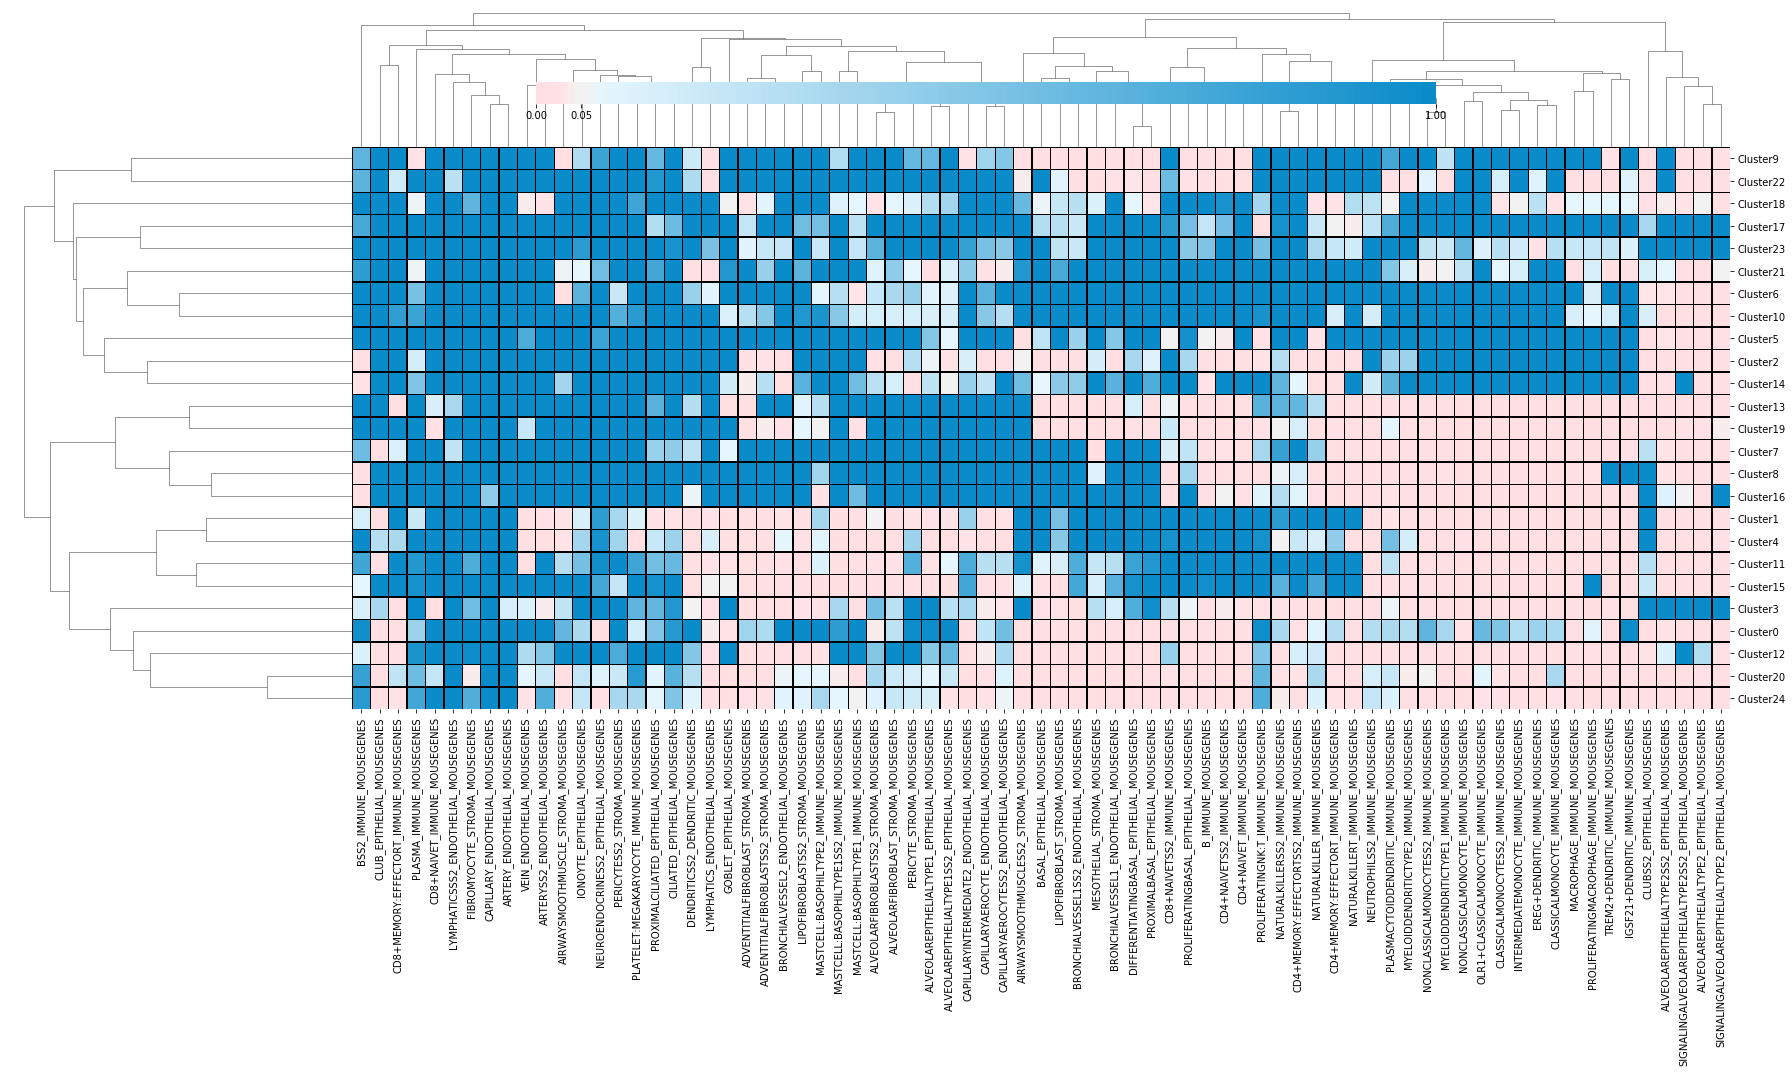

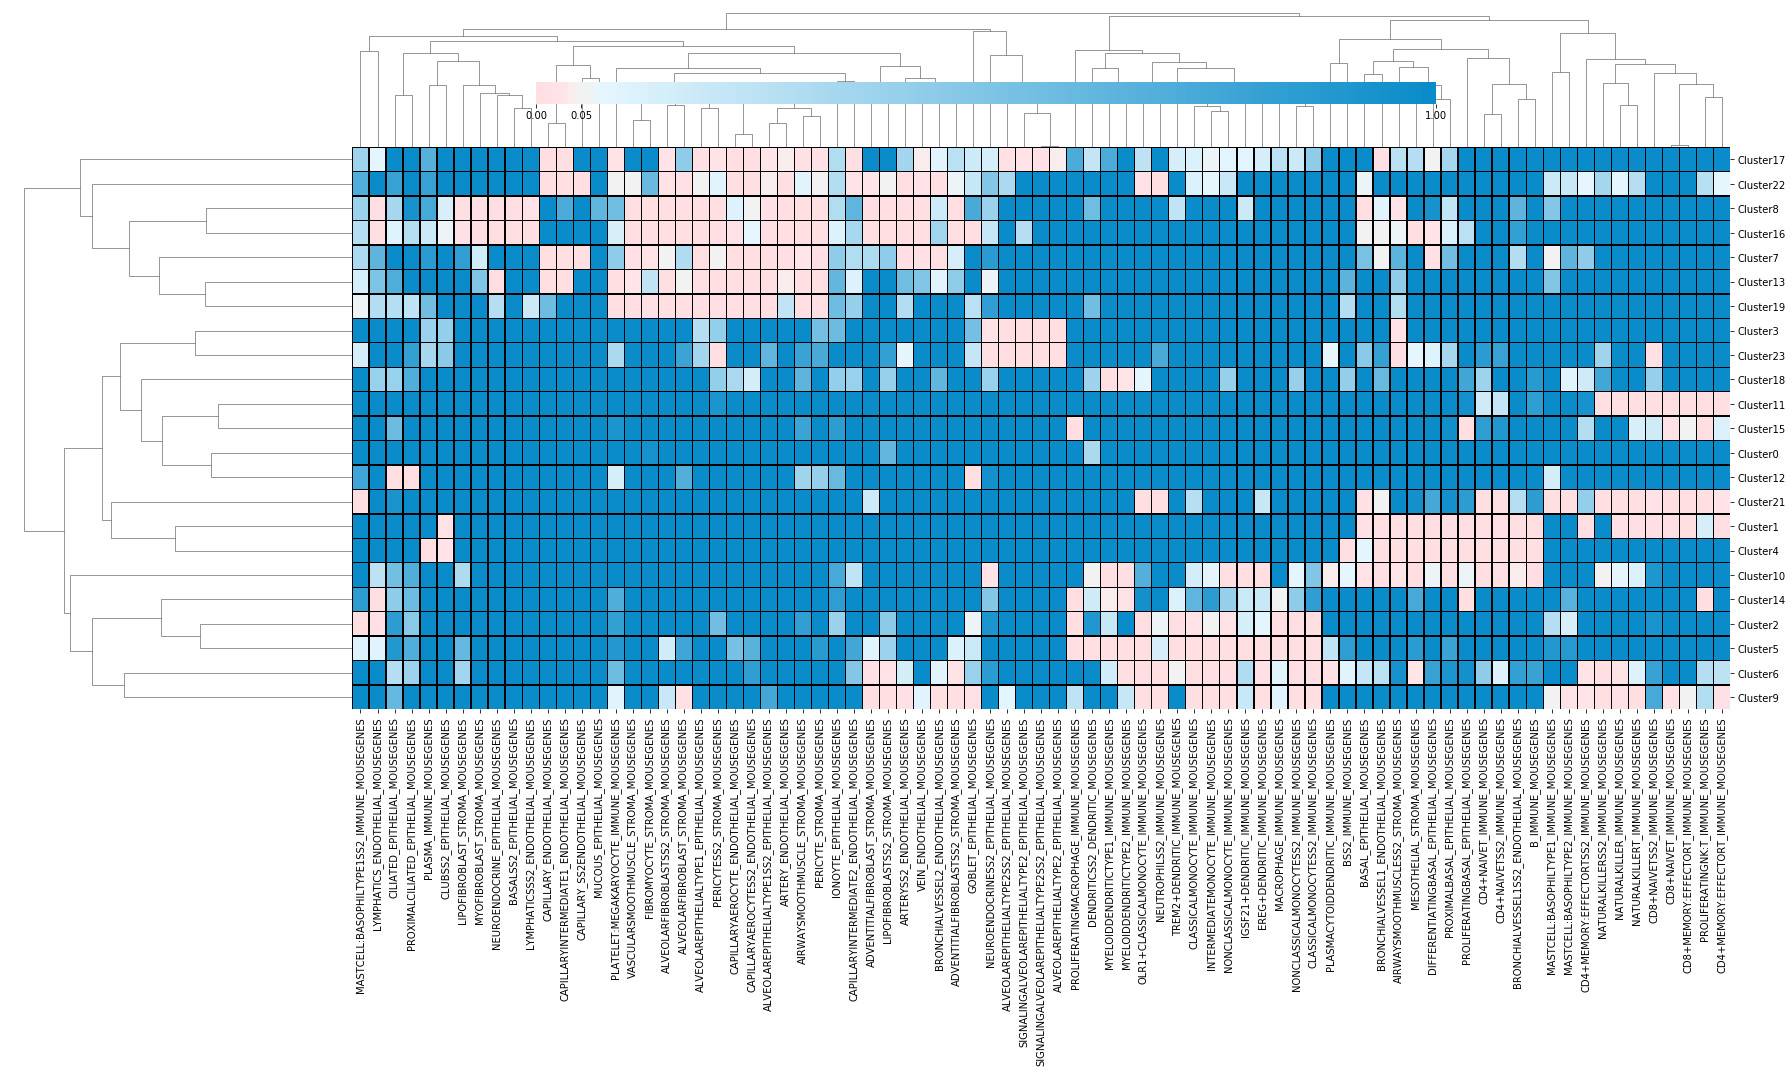

In [27]:
## STEP 5.1 [Average Log FC]
########################################## Create Heatmap for GSEA Matrix ##########################################
# Obtain heatmaps based on Fold Change results from seurat to create heatmap ofsignificant Gene Sets
# NEGATIVE
filename_neg = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_NegativeClusterMatrix_AvgFC.txt"
#filename_neg = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_NegativeClusterMatrix.txt"
df_neg = pd.read_csv(filename_neg, header = 0, index_col = 0, sep = "\t")
rdbl = sns.diverging_palette(h_neg=10, h_pos=240, sep=3, as_cmap=True, s=99, l=55)
ax_neg = sns.clustermap(df_neg, cmap=rdbl, figsize=(25, 15), linewidths = 0.3, linecolor='black', vmin = 0, vmax = 1, center=0.05, cbar_kws={"ticks":[0,0.05,1], "orientation":"horizontal"}, cbar_pos=(0.3, 0.9, 0.5, 0.02))
plot_neg = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_NegativeClusterMatrix_avgFC.png"
#plot_neg = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_NegativeClusterMatrix_Top250.png"
ax_neg.savefig(plot_neg, dpi = 800)

# POSITIVE
filename_pos = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_PositiveClusterMatrix_AvgFC.txt"
#filename_pos = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_PositiveClusterMatrix.txt"
df_pos = pd.read_csv(filename_pos, header = 0, index_col = 0, sep = "\t")
rdbl = sns.diverging_palette(h_neg=10, h_pos=240, sep=3, as_cmap=True, s=99, l=55)
ax_pos = sns.clustermap(df_pos, cmap=rdbl, figsize=(25, 15), linewidths = 0.3, linecolor='black', vmin = 0, vmax = 1, center=0.05, cbar_kws={"ticks":[0,0.05,1], "orientation":"horizontal"}, cbar_pos=(0.3, 0.9, 0.5, 0.02))
plot_pos = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_PositiveClusterMatrix_avgFC.png"
#plot_pos = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_PositiveClusterMatrix_Top250.png"
ax_pos.savefig(plot_pos, dpi = 800)
####################################################################################################################

In [ ]:
## STEP 2.2 [Absolute Average Log FC]
################################ Create .rnk files from markers_per_cluster(Seurat) ################################
dir2 = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/"
filename2 = "/Users/sha6hg/Desktop/IPF_scRNA/Mouse_integrated_MarkerList.txt"
df1 = pd.read_csv(filename2, header = 0, sep = "\t", index_col = 0)
for i in set(df1["cluster"]):
    df2 = df1[df1["cluster"] == i]
    df3 = df2[["gene", "avg_logFC"]]
    df3["FC_abs"] = df3["avg_logFC"].abs()
    df4 = df3[["gene", "FC_abs"]]
    df4.columns = ["##", ""]
    filename3 = dir2 + "Mouse_Integrated_AbsAvgFC_" + str(i) + ".rnk"
    df4.to_csv(filename3, index = None, header = True, sep = "\t")
####################################################################################################################

In [ ]:
## STEP 3.2 [Absolute Average Log FC]
############################################# Run GSEAPreranked v4.0.3 #############################################
dir3 = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/"
os.chdir(dir3)
gmt_file = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/KrasnowAnnotationsForGSEA.gmt"
command1 = "/Users/sha6hg/Desktop/Tools/GSEA_4.0.3/gsea-cli.sh GSEAPreranked -gmx "
command2 = " -rnk "
command3 = " -out /Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/Results_AbsAvgFC -rpt_label "
file_list = [file for file in os.listdir(dir3) if ("_AbsAvgFC_" in file and ".rnk" in file)]
for file in file_list:
    filename4 = file.split(".rnk")[0]
    command_to_run = command1 +  gmt_file + command2 + dir3 + file + command3 + filename4
    #print(command_to_run)
    # if the output of print == 0, the command was run successfully
    print(os.system(command_to_run))
####################################################################################################################

In [ ]:
## STEP 4.2 [Absolute Average Log FC]
############################################# Create FDR GSEA Matrix ###############################################
# Functions for sorting list with strings with numericals in correct order
# Source: https://www.tutorialspoint.com/How-to-correctly-sort-a-string-with-a-number-inside-in-Python
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)',text) ]

# Create a matrix containing Clusters[.rnk] as rows and Gene Sets[.gmt] as columns populated with FDR values from GSEA results
# Iterate to gather list of directories
directory = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/Results_AbsAvgFC/"
list_dir = [dir1 for dir1 in os.listdir(directory) if "Mouse_Integrated_" in dir1]
list_dir_path = [directory + dir1 for dir1 in list_dir]

# Create an index for dataframes to merge
file = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/KrasnowAnnotationsCategories.txt"
df1 = pd.read_csv(file, header = None)
df1["Categories"] = df1[0].apply(lambda x: x.upper())
df_pos = pd.DataFrame(index = df1["Categories"])
df_pos = df_pos.reset_index(inplace = False)
df_neg = pd.DataFrame(index = df1["Categories"])
df_neg = df_neg.reset_index(inplace = False) 

for directory in list_dir_path:
    column_list = ["index", "GS follow link to MSigDB", "GS DETAILS", "SIZE", "ES", "NES", "NOM p-val", "FDR q-val", "FWER p-val", "RANK AT MAX", "LEADING EDGE"]
    cluster = "Cluster" + directory.split("/")[7].split(".")[0].split("_")[3]
    column_list1 = ["Categories", cluster]

    # Create a matrix for negatively expressed gene sets
    file_neg1 = [file for file in os.listdir(directory) if ("gsea_report_for_na_neg" in file and ".html" in file)]
    file_neg = directory + "/" + str(file_neg1[0])
    if pd.read_html(file_neg):
        df1_neg = pd.read_html(file_neg)[0]
        df1_neg.columns = column_list
        df2_neg = df1_neg[["GS follow link to MSigDB", "FDR q-val"]]
        df2_neg.columns = column_list1
        df_neg = df2_neg.merge(df_neg, how = "outer", right_on = "Categories", left_on = "Categories") 
        #print(file_neg)
        #print(df_neg.head())
df_neg.index = df_neg["Categories"]
list1 = [column for column in df_neg.columns if "Cluster" in column ]
list1.sort(key=natural_keys)
df_neg = df_neg[list1]
df_neg = df_neg.dropna(axis = 0, how = "all")
df_neg = df_neg.fillna(value=1, inplace=False)
df_neg = df_neg.T
filename_neg = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_NegativeClusterMatrix_AbsAvgFC.txt"
df_neg.to_csv(filename_neg, header = True, index = True, sep = "\t")

for directory in list_dir_path:
    column_list = ["index", "GS follow link to MSigDB", "GS DETAILS", "SIZE", "ES", "NES", "NOM p-val", "FDR q-val", "FWER p-val", "RANK AT MAX", "LEADING EDGE"]
    cluster = "Cluster" + directory.split("/")[7].split(".")[0].split("_")[3]
    column_list1 = ["Categories", cluster]
    
    # Create a matrix for positively expressed gene sets
    file_pos1 = [file for file in os.listdir(directory) if ("gsea_report_for_na_pos" in file and ".html" in file)]
    file_pos = directory + "/" + str(file_pos1[0])
    if pd.read_html(file_pos):
        df1_pos = pd.read_html(file_pos)[0]
        df1_pos.columns = column_list
        df2_pos = df1_pos[["GS follow link to MSigDB", "FDR q-val"]]
        df2_pos.columns = column_list1
        df_pos = df2_pos.merge(df_pos, how = "outer", right_on = "Categories", left_on = "Categories")    
        #print(file_pos)
        #print(df_pos.head())
df_pos.index = df_pos["Categories"]
list1 = [column for column in df_pos.columns if "Cluster" in column ]
list1.sort(key=natural_keys)
df_pos = df_pos[list1]
df_pos = df_pos.dropna(axis = 0, how = "all")
df_pos = df_pos.fillna(value=1, inplace=False)
df_pos = df_pos.T
filename_pos = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_PositiveClusterMatrix_AbsAvgFC.txt"
df_pos.to_csv(filename_pos, header = True, index = True, sep = "\t")
####################################################################################################################

In [ ]:
## STEP 5.2 [Absolute Average Log FC]
########################################## Create Heatmap for GSEA Matrix ##########################################
# Obtain heatmaps based on Fold Change results from seurat to create heatmap ofsignificant Gene Sets
# NEGATIVE
filename_neg = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_NegativeClusterMatrix_AbsAvgFC.txt"
df_neg = pd.read_csv(filename_neg, header = 0, index_col = 0, sep = "\t")
rdbl = sns.diverging_palette(h_neg=10, h_pos=240, sep=3, as_cmap=True, s=99, l=55)
ax_neg = sns.clustermap(df_neg, cmap=rdbl, figsize=(25, 15), linewidths = 0.3, linecolor='black', col_cluster = False, vmin = 0, vmax = 1, center=0.05, cbar_kws={"ticks":[0,0.05,1], "orientation":"horizontal"}, cbar_pos=(0.3, 0.9, 0.5, 0.02))
plot_neg = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_NegativeClusterMatrix_AbsAvgFC.png"
ax_neg.savefig(plot_neg, dpi = 800)

# POSITIVE
filename_pos = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_PositiveClusterMatrix_AbsAvgFC.txt"
df_pos = pd.read_csv(filename_pos, header = 0, index_col = 0, sep = "\t")
rdbl = sns.diverging_palette(h_neg=10, h_pos=240, sep=3, as_cmap=True, s=99, l=55)
ax_pos = sns.clustermap(df_pos, cmap=rdbl, figsize=(25, 15), linewidths = 0.3, linecolor='black', col_cluster = False, vmin = 0, vmax = 1, center=0.05, cbar_kws={"ticks":[0,0.05,1], "orientation":"horizontal"}, cbar_pos=(0.3, 0.9, 0.5, 0.02))
plot_pos = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_PositiveClusterMatrix_AbsAvgFC.png"
ax_pos.savefig(plot_pos, dpi = 800)
####################################################################################################################

In [ ]:
## STEP 2.3 [Unweighted (by assigning the same value to each gene across all clusters)]
################################ Create .rnk files from markers_per_cluster(Seurat) ################################
dir2 = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/"
filename2 = "/Users/sha6hg/Desktop/IPF_scRNA/Mouse_integrated_MarkerList.txt"
df1 = pd.read_csv(filename2, header = 0, sep = "\t", index_col = 0)
for i in set(df1["cluster"]):
    df2 = df1[df1["cluster"] == i]
    df3 = df2[["gene", "avg_logFC"]]
    df3["unweighted"] = 1
    df4 = df3[["gene", "unweighted"]]
    df4.columns = ["##", ""]
    filename3 = dir2 + "Mouse_Integrated_Unweighted_" + str(i) + ".rnk"
    df4.to_csv(filename3, index = None, header = True, sep = "\t")
####################################################################################################################

In [ ]:
## STEP 3.3 [Unweighted (by assigning the same value to each gene across all clusters)]
############################################# Run GSEAPreranked v4.0.3 #############################################
dir3 = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/"
os.chdir(dir3)
gmt_file = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/KrasnowAnnotationsForGSEA.gmt"
command1 = "/Users/sha6hg/Desktop/Tools/GSEA_4.0.3/gsea-cli.sh GSEAPreranked -gmx "
command2 = " -rnk "
command3 = " -out /Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/Results_Unweighted -rpt_label "
file_list = [file for file in os.listdir(dir3) if ("_Unweighted_" in file and ".rnk" in file)]
for file in file_list:
    filename4 = file.split(".rnk")[0]
    command_to_run = command1 +  gmt_file + command2 + dir3 + file + command3 + filename4
    #print(command_to_run)
    # if the output of print == 0, the command was run successfully
    print(os.system(command_to_run))
####################################################################################################################

In [ ]:
## STEP 4.3 [Unweighted (by assigning the same value to each gene across all clusters)]
############################################# Create FDR GSEA Matrix ###############################################
# Functions for sorting list with strings with numericals in correct order
# Source: https://www.tutorialspoint.com/How-to-correctly-sort-a-string-with-a-number-inside-in-Python
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)',text) ]

# Create a matrix containing Clusters[.rnk] as rows and Gene Sets[.gmt] as columns populated with FDR values from GSEA results
# Iterate to gather list of directories
directory = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/Results_Unweighted/"
list_dir = [dir1 for dir1 in os.listdir(directory) if "Mouse_Integrated_" in dir1]
list_dir_path = [directory + dir1 for dir1 in list_dir]

# Create an index for dataframes to merge
file = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/KrasnowAnnotationsCategories.txt"
df1 = pd.read_csv(file, header = None)
df1["Categories"] = df1[0].apply(lambda x: x.upper())
df_pos = pd.DataFrame(index = df1["Categories"])
df_pos = df_pos.reset_index(inplace = False)
df_neg = pd.DataFrame(index = df1["Categories"])
df_neg = df_neg.reset_index(inplace = False) 

for directory in list_dir_path:
    column_list = ["index", "GS follow link to MSigDB", "GS DETAILS", "SIZE", "ES", "NES", "NOM p-val", "FDR q-val", "FWER p-val", "RANK AT MAX", "LEADING EDGE"]
    cluster = "Cluster" + directory.split("/")[7].split(".")[0].split("_")[3]
    column_list1 = ["Categories", cluster]

    # Create a matrix for negatively expressed gene sets
    file_neg1 = [file for file in os.listdir(directory) if ("gsea_report_for_na_neg" in file and ".html" in file)]
    file_neg = directory + "/" + str(file_neg1[0])
    if pd.read_html(file_neg):
        df1_neg = pd.read_html(file_neg)[0]
        df1_neg.columns = column_list
        df2_neg = df1_neg[["GS follow link to MSigDB", "FDR q-val"]]
        df2_neg.columns = column_list1
        df_neg = df2_neg.merge(df_neg, how = "outer", right_on = "Categories", left_on = "Categories") 
        #print(file_neg)
        #print(df_neg.head())
df_neg.index = df_neg["Categories"]
list1 = [column for column in df_neg.columns if "Cluster" in column ]
list1.sort(key=natural_keys)
df_neg = df_neg[list1]
df_neg = df_neg.dropna(axis = 0, how = "all")
df_neg = df_neg.fillna(value=1, inplace=False)
df_neg = df_neg.T
filename_neg = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_NegativeClusterMatrix_Unweighted.txt"
df_neg.to_csv(filename_neg, header = True, index = True, sep = "\t")

for directory in list_dir_path:
    column_list = ["index", "GS follow link to MSigDB", "GS DETAILS", "SIZE", "ES", "NES", "NOM p-val", "FDR q-val", "FWER p-val", "RANK AT MAX", "LEADING EDGE"]
    cluster = "Cluster" + directory.split("/")[7].split(".")[0].split("_")[3]
    column_list1 = ["Categories", cluster]
    
    # Create a matrix for positively expressed gene sets
    file_pos1 = [file for file in os.listdir(directory) if ("gsea_report_for_na_pos" in file and ".html" in file)]
    file_pos = directory + "/" + str(file_pos1[0])
    if pd.read_html(file_pos):
        df1_pos = pd.read_html(file_pos)[0]
        df1_pos.columns = column_list
        df2_pos = df1_pos[["GS follow link to MSigDB", "FDR q-val"]]
        df2_pos.columns = column_list1
        df_pos = df2_pos.merge(df_pos, how = "outer", right_on = "Categories", left_on = "Categories")    
        #print(file_pos)
        #print(df_pos.head())
df_pos.index = df_pos["Categories"]
list1 = [column for column in df_pos.columns if "Cluster" in column ]
list1.sort(key=natural_keys)
df_pos = df_pos[list1]
df_pos = df_pos.dropna(axis = 0, how = "all")
df_pos = df_pos.fillna(value=1, inplace=False)
df_pos = df_pos.T
filename_pos = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_PositiveClusterMatrix_Unweighted.txt"
df_pos.to_csv(filename_pos, header = True, index = True, sep = "\t")
####################################################################################################################

In [ ]:
## STEP 5.3 [Unweighted (by assigning the same value to each gene across all clusters)]
########################################## Create Heatmap for GSEA Matrix ##########################################
# Obtain heatmaps based on Fold Change results from seurat to create heatmap ofsignificant Gene Sets
# NEGATIVE
filename_neg = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_NegativeClusterMatrix_Unweighted.txt"
df_neg = pd.read_csv(filename_neg, header = 0, index_col = 0, sep = "\t")
rdbl = sns.diverging_palette(h_neg=10, h_pos=240, sep=3, as_cmap=True, s=99, l=55)
ax_neg = sns.clustermap(df_neg, cmap=rdbl, figsize=(25, 15), linewidths = 0.3, linecolor='black', col_cluster = False, vmin = 0, vmax = 1, center=0.05, cbar_kws={"ticks":[0,0.05,1], "orientation":"horizontal"}, cbar_pos=(0.3, 0.9, 0.5, 0.02))
plot_neg = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_NegativeClusterMatrix_Unweighted.png"
ax_neg.savefig(plot_neg, dpi = 800)

# POSITIVE
filename_pos = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_PositiveClusterMatrix_Unweighted.txt"
df_pos = pd.read_csv(filename_pos, header = 0, index_col = 0, sep = "\t")
rdbl = sns.diverging_palette(h_neg=10, h_pos=240, sep=3, as_cmap=True, s=99, l=55)
ax_pos = sns.clustermap(df_pos, cmap=rdbl, figsize=(25, 15), linewidths = 0.3, linecolor='black', col_cluster = False, vmin = 0, vmax = 1, center=0.05, cbar_kws={"ticks":[0,0.05,1], "orientation":"horizontal"}, cbar_pos=(0.3, 0.9, 0.5, 0.02))
plot_pos = "/Users/sha6hg/Desktop/IPF_scRNA/GSEA_Analysis/GSEA_PositiveClusterMatrix_Unweighted.png"
ax_pos.savefig(plot_pos, dpi = 800)
####################################################################################################################